<a href="https://colab.research.google.com/github/AYA0HASSAN/SimpleRNN/blob/main/RNNlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RNN** are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations, they have a “memory” which captures information about what has been calculated so far

In [1]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from __future__ import print_function
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

stop_words = stopwords.words('english')

In [3]:
text_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
text_df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)
text_df.rename(columns = {'v1': 'Target', 'v2': 'Message'}, inplace = True)
text_df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Target   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Check Nulls

In [5]:
print("Number of Nulls :")
text_df.isna().sum()

Number of Nulls :


Target     0
Message    0
dtype: int64

### Check and Removing Duplicats

In [6]:
print("Number of Duplicats :",text_df.duplicated().sum())
print("Removing Duplicats ......")
text_df = text_df.drop_duplicates()
print("Number of Duplicats :",text_df.duplicated().sum())

Number of Duplicats : 403
Removing Duplicats ......
Number of Duplicats : 0


### Check of Balancing Data

In [7]:
text_df['Target'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='Target', ylabel='count'>

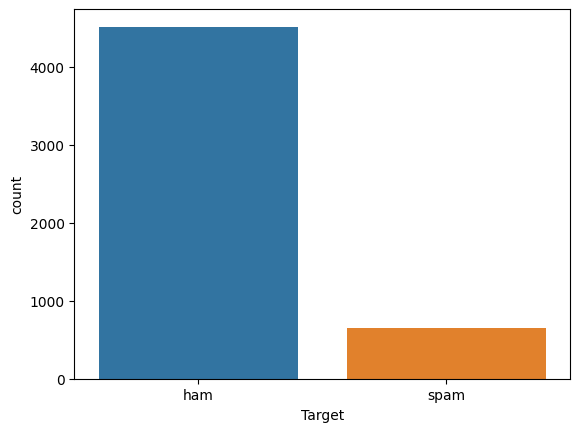

In [8]:
sns.countplot(x ='Target', data = text_df)

### Encode Label

In [9]:
text_df['Target'] = text_df['Target'].apply(lambda x: 0 if x == 'ham'else 1)
text_df.head()


,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Show Samples of texts to find out required preprocessing steps

In [10]:
for i in range(5):
  print(i,text_df['Message'][i])

0 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 Ok lar... Joking wif u oni...
2 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 U dun say so early hor... U c already then say...
4 Nah I don't think he goes to usf, he lives around here though


## Cleaning and Preprocessing
- Remove any characters not found in the alphabet.
- Make every character lowercase.
- Split stings into substrings.

In [11]:
txt = []
corpus = list(text_df['Message'])
for i in range(len(corpus)):
    r = re.sub('[^a-zA-Z]', ' ', corpus[i])
    r = r.lower()
    r = r.split()
    r = ' '.join(r)
    txt.append(r)
text_df['Message'] = txt
text_df['Message'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: Message, dtype: object

### Tokenizing the text. This converts the strings into smaller parts.

In [12]:
text_df['Tokens'] = text_df.apply(lambda row: word_tokenize(row['Message']), axis = 1)
text_df.head()

,Target,Message,Tokens
0,0,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,0,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


### Removing Stop Words

In [13]:
def remove_stopwords(words, stop_words = stop_words):
    return [word for word in words if word not in stop_words]

In [14]:
text_df['Tokens'] = text_df.apply(lambda row: remove_stopwords(row['Tokens']), axis = 1)

text_df.head()

,Target,Message,Tokens
0,0,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n..."
1,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,free entry in a wkly comp to win fa cup final ...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,0,nah i don t think he goes to usf he lives arou...,"[nah, think, goes, usf, lives, around, though]"


In [15]:
corpus = []
for i in text_df['Tokens']:
    msg = ' '.join(row for row in i)
    corpus.append(msg)

text_df['CleanMessage'] = corpus
text_df.head()

,Target,Message,Tokens,CleanMessage
0,0,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...
3,0,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,0,nah i don t think he goes to usf he lives arou...,"[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though


In [16]:
X_train, X_test, y_train, y_test = train_test_split(text_df['CleanMessage'], text_df['Target'], test_size = 0.2,stratify= text_df['Target'], random_state = 42)

In order to train and test the models, first we need to vectorize data. Vectorization is the process of converting text data into numerical vectors that can be fed into my classification models. Remember, computers understand numbers, not words!

In [17]:
vocabSize = 10000
tokenizer = Tokenizer(num_words=vocabSize, oov_token='UNK')

# Convert text data to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### Add Padding to be all same length

In [18]:
def pad_seq(seq, maxlen):
  return np.array(pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post'))

In [19]:
maxlen = len(text_df["CleanMessage"].max())

x_train = pad_seq(x_train, maxlen)
x_test = pad_seq(x_test, maxlen)

print(f"Max. Length of Massage Before Cleaning = {len(text_df['Message'].max())}")

print(f"Max. Length of Massage After Cleaning = {maxlen}")
print(f"Train shape = {x_train.shape} and Test shape = {x_test.shape}")

print("Training Example: ",x_train[0])
print("Testing Example: ",x_test[0])


Max. Length of Massage Before Cleaning = 98
Max. Length of Massage After Cleaning = 77
Train shape = (4135, 77) and Test shape = (1034, 77)
Training Example:  [ 184   17  353 3021 3022    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
Testing Example:  [  14  119   20    9  141  194   57   16  601  425  232 1446  110  180
   98   20  342    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


### Compute class weights to handle imbalance

In [20]:
class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
class_weight_dict = {class_label: weight for class_label, weight in zip(class_labels, class_weights)}
print(f"Weight of Spam Class = {class_weight_dict[1]} and Weight of Ham Class = {class_weight_dict[0]}")

Weight of Spam Class = 3.960727969348659 and Weight of Ham Class = 0.5722391364517022


In [21]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocabSize, output_dim=embedding_dim, input_length=maxlen))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 100)           1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                7550      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1007601 (3.84 MB)
Trainable params: 1007601 (3.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
104/104 [==============================] - 23s 192ms/step - loss: 0.4479 - accuracy: 0.8105 - val_loss: 0.2776 - val_accuracy: 0.9117
Epoch 2/10
104/104 [==============================] - 13s 121ms/step - loss: 0.2157 - accuracy: 0.9374 - val_loss: 0.2478 - val_accuracy: 0.9226
Epoch 3/10
104/104 [==============================] - 11s 109ms/step - loss: 0.1108 - accuracy: 0.9728 - val_loss: 0.2009 - val_accuracy: 0.9347
Epoch 4/10
104/104 [==============================] - 10s 89ms/step - loss: 0.0548 - accuracy: 0.9861 - val_loss: 0.1743 - val_accuracy: 0.9456
Epoch 5/10
104/104 [==============================] - 9s 92ms/step - loss: 0.0411 - accuracy: 0.9903 - val_loss: 0.2591 - val_accuracy: 0.9238
Epoch 6/10
104/104 [==============================] - 9s 87ms/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 0.2022 - val_accuracy: 0.9444
Epoch 7/10
104/104 [==============================] - 10s 93ms/step - loss: 0.0469 - accuracy: 0.9897 - val_loss: 0.1368 - val_accuracy

### Results

In [23]:
predictions = model.predict(x_test)

binary_predictions = (predictions > 0.5).astype(int)

33/33 [==============================] - 0s 7ms/step


In [24]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[879  24]
 [ 18 113]]


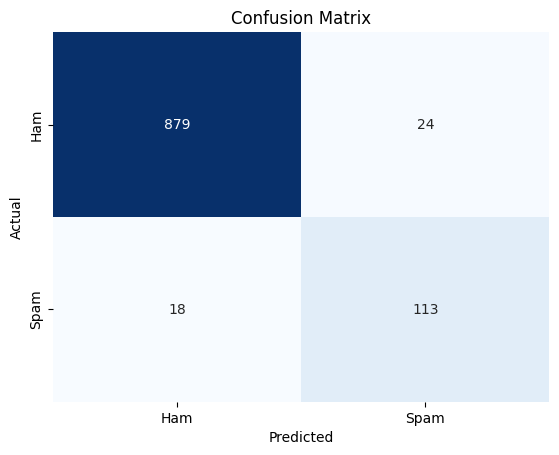

In [25]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()